## COMP 6934 Winter 2025 In class Work 11

Seaborn.

The dataset is the same as problem set 2 through 6, taken from <https://www.kaggle.com/datasets/jash312/canada-daily-weather-data-from-2018-to-2023>

But I've improved the data set by removing the strange degree symbols in the column names. Get the improved data set weather.zip


## Problem Set 11

Exploring some plot types in Seaborn

Demonstrate a plot type or customization from Seaborn that has not been covered in our notes or problems so far in this course.

* You are to demonstrate the plot using data from the weather dataset we have been using in the course
*  You can reduce, tidy or re-code the data using any of the pandas techniques available to you, as long as the reduced data still allows you to demonstrate the capabilities of your chosen plot.
* If you use a plot type from the tutorial references in note 11, https://www.datacamp.com/tutorial/seaborn-python-tutorial, you should provide **additional customization**, since the tutorial is incorporated into the notes and therefore counts as already covered in the course.
* The seaborn [gallery](https://seaborn.pydata.org/examples/index.html) and other online galleries are good places to look for alternative plot types.
* The API [documentation](https://seaborn.pydata.org/api.html) for each plot type displays some customization examples at the end of each plot type page.
* Be sure to attribute anything you copy or use from the web.


In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

In [172]:
df_NL = pd.read_csv('Data/NL_weather.csv')

C:\Users\Mas85\AppData\Local\Temp\ipykernel_13480\3865954560.py:1: DtypeWarning: Columns (3,20,22,26,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df_NL = pd.read_csv('Data/NL_weather.csv')


In [173]:
df_NL['Station Name'].unique()

array(['ARGENTIA (AUT)', 'BADGER (AUT)', "BAY D'ESPOIR GEN STN",
       'BONAVISTA', 'BURGEO NL', 'BURNT POND', 'BUTLERVILLE',
       'CAPE RACE (AUT)', 'CHARLESTON', 'CORMACK RCS', 'CORNER BROOK',
       'COW HEAD', 'DANIELS HARBOUR', "DANIEL'S HARBOUR", 'DEER LAKE',
       'DEER LAKE A', 'ENGLEE (AUT)', 'FEROLLE POINT (AUT)',
       'GANDER INTL A', 'GANDER AIRPORT CS', 'HARBOUR BRETON',
       'INDIAN BAY B.B.', 'LA SCIE', 'LETHBRIDGE', 'MIDDLE ARM',
       'MILLERTOWN RCS', 'PLUM POINT', 'PORT AUX BASQUES',
       'ROCKY HARBOUR CS', 'SAGONA ISLAND', 'ST. ANTHONY A', 'ST ANTHONY',
       "ST. JOHN'S INTL A", 'ST JOHNS WEST CLIMATE', 'ST LAWRENCE',
       'SOPS ARM WHITE BAY', 'STEPHENVILLE A', 'STEPHENVILLE RCS',
       'SWIFT CURRENT', 'TERRA NOVA NAT PARK CS', 'TWILLINGATE (AUT)',
       'WINTERLAND', 'WINTERLAND BRANCH HILL', 'WRECKHOUSE',
       'GRATES COVE', 'POOLS ISLAND', 'MAIN BROOK', 'MARTICOT ISLAND',
       "MCIVER'S", 'CAPE KAKKIVIAK', 'CARTWRIGHT A', 'CHURCHILL FALLS'

In [174]:
# Convert 'Date/Time' column to datetime format, if it's not already
df_NL['Date/Time'] = pd.to_datetime(df_NL['Date/Time'])

In [175]:
combined_df = df_NL[
    (df_NL['Date/Time'].dt.year == 2020) &
    (df_NL['Station Name'].isin(["ST. JOHN'S INTL A", "NAIN", "ST LAWRENCE", "LA SCIE"]))
][['Date/Time', 'Station Name', 'Mean Temp (C)']]

In [176]:
combined_df['Station Name'] == "ST LAWRENCE"

#combined_df.dropna()

35910    False
35911    False
35912    False
35913    False
35914    False
         ...  
92769    False
92770    False
92771    False
92772    False
92773    False
Name: Station Name, Length: 1430, dtype: bool

In [177]:
combined_df['Date/Time'] = pd.to_datetime(combined_df['Date/Time']).dt.to_period('M')

In [178]:
combined_df.groupby('Station Name')['Mean Temp (C)'].mean().reset_index(drop=True, inplace=True)

In [179]:
combined_df['Date/Time'] = combined_df['Date/Time'].astype(str)

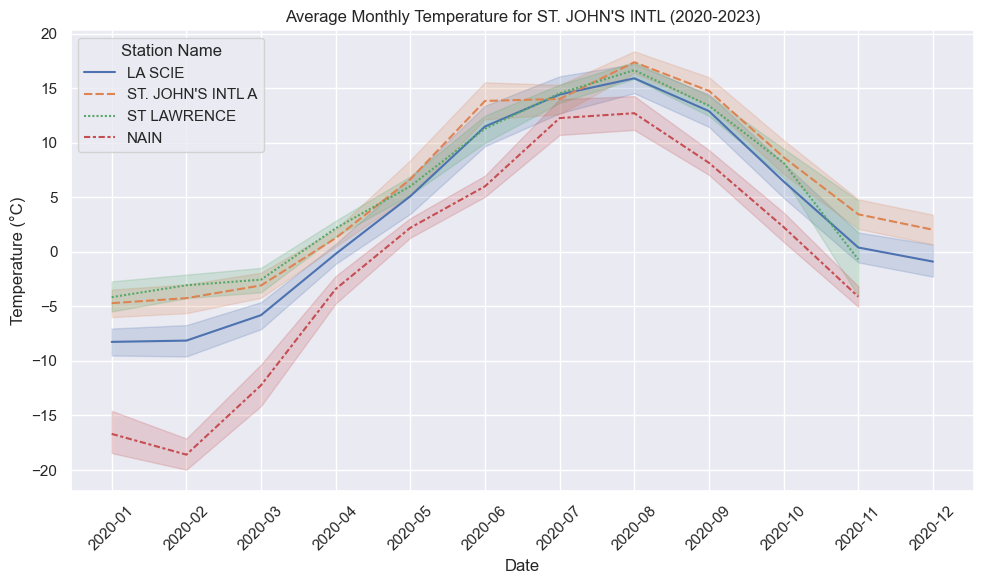

In [180]:
# Plot using Seaborn's error band line plot
plt.figure(figsize=(10, 6))

sns.set_theme(style="darkgrid")
sns.lineplot(x="Date/Time", y="Mean Temp (C)",
             hue="Station Name", style="Station Name",
             data=combined_df)

plt.title("Average Monthly Temperature for ST. JOHN'S INTL (2020-2023)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Problem 11.1

Briefly explain the purpose and intention of the chosen plot type and/or customization: what is is supposed to help visualize concerning data?


### Problem 11.2

Code and display the plot, including any data reduction steps needed. 

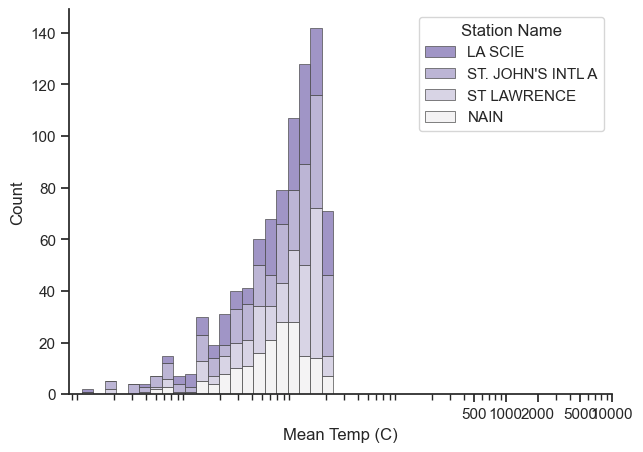

In [184]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    combined_df,
    x="Mean Temp (C)", 
    hue="Station Name",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])

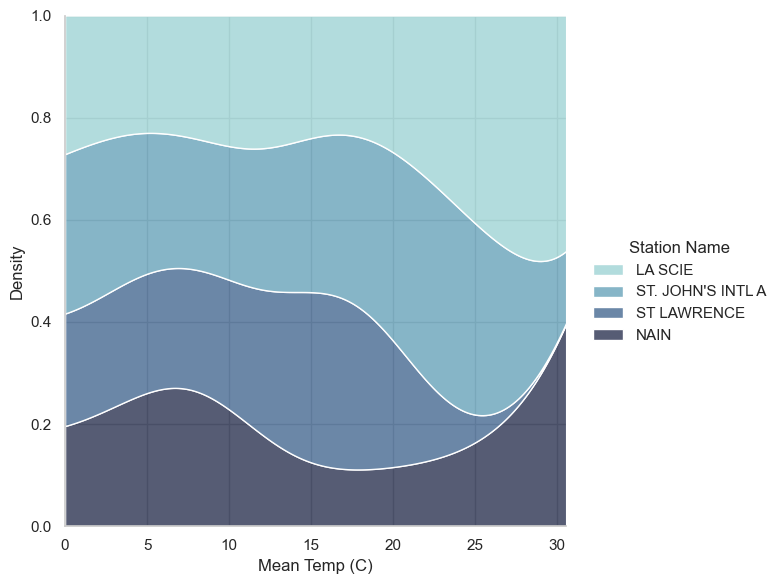

In [185]:

sns.set_theme(style="whitegrid")


# Plot the distribution of clarity ratings, conditional on carat
sns.displot(
    data=combined_df,
    x="Mean Temp (C)", 
    hue="Station Name",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

### Problem 11.3

Does you plot help reveal any features or characteristics of the chosen data set? Explain how some data feature(s) are revealed by the visualization.

# Attributions

Be sure to add your own sources or indicate you have none to add.  Sources can be web sites, text materials, and so on. They do not have to be hyperlinks. Other people are also sources, but they are not allowed for in class credit problems.

| Source | What is it | How used |
|--|--|--|
| <https://www.kaggle.com/datasets/jash312/canada-daily-weather-data-from-2018-to-2023> | data sets | taken directly as csv files  |